# Import

In [1]:
!pwd
!python --version
!which python

/home/shpaik/21-aaai2022v2/Fig1/run_synth_stationary
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [2]:
import os
current_dir = os.getcwd()
print(current_dir)

# control the maximum number of threads that numpy uses by 8
os.environ["OMP_NUM_THREADS"] = "8" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "8" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "8" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "8" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "8" # export NUMEXPR_NUM_THREADS=6

/home/shpaik/21-aaai2022v2/Fig1/run_synth_stationary


In [3]:
os.chdir("../../")
from lib_external.SCLUB import SCLUB
from lib_external.DyClu import DyClu
os.chdir(current_dir)

%run SYNTH_functions.ipynb

In [4]:
my_data = "SYNTH"

we_need_tuning = True # True: tuning will be inclued / False : use already tuned paramter

TUNED_V_LAM = {
    'Random': {'v': 0, 'lam': 0},
    'RGraphTS': {'v': 0, 'lam': 0},
    'LinTS': {'v': 0, 'lam': 0},
    'SemiRGraphTS': {'v': 0, 'lam': 0},
    'GraphUCBlocal': {'v': 0, 'lam': 0},
    'CLUB': {'v': 0, 'lam': 0},    
    'IndividualSemiRidgeGraphThompson': {'v': 0, 'lam': 0},
    'LinTS_Single': {'v': 0, 'lam': 0},
    'SemiTS_Single': {'v': 0, 'lam': 0},
    'SCLUB': {'v': 0, 'lam': 0},
    'DyClu': {'v': 0, 'lam': 0}
}

In [5]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [6]:
plt.style.use("ggplot")

[]

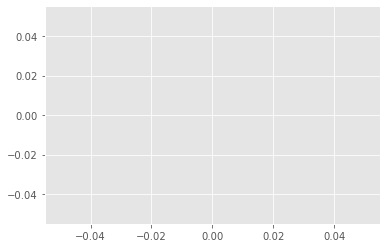

In [7]:
plt.figure()
plt.plot()

In [8]:
simul_n=5

# fix n, N, d, gamma
user_num = 30
arm_num = 10
dimension = 40
gamma = 5

time_horizon = 50000
tuning_time_horizon = 5000

nu_type = "0" # stationary
arm_type = "sparse"
our_graph_type = "ER"

IMG_FOLDER = "results/"
IMG_FOLDER_FOR_OS = current_dir+"/"+IMG_FOLDER

## Other settings

In [9]:
print("--------------------")
tuning_simul_n = 1

const_R = 0.1
delta = 0.05

################################## v_set and lam_set ##################################
v_set=[0.001, 0.01, 0.1, 1., 10.]
lam_set=[0.008, 0.04, 0.2, 1., 5.]

v_num = len(v_set); lam_num = len(lam_set)
v_and_lam_num = v_num * lam_num

epsilon = 1
threshold = 0.5
prob = 0.4

lap_type = "random_walk"

##### For DyClu (default option) ####
dyclu_options = {
    'tau_e': 20, # size of sliding window,
    'alpha': 0.3,
    'delta_1': 1e-1,
    'delta_2': 1e-1,
    'change_detection_alpha': 0.01,
    'neighbor_identification_alpha': 0.01 ,
    'dataSharing': False, 
    'aggregationMethod': 'combine',
    'useOutdated': True ,
    'maxNumOutdatedModels': None, 
}

##### obsolete #####
const_alpha_2 = 0.15
const_tol_1 = dimension # * 10
const_tol_2 = const_tol_1 * 1e-5 
print(f"to1_1: {const_tol_1}, to1_2: {const_tol_2},")

--------------------
to1_1: 40, to1_2: 0.0004,


## Graph & Laplacian

In [10]:
our_graph, our_laplacian, users_features, symm_laplacian = set_graph_and_lapl_for_experiment(user_num, dimension, prob, threshold, our_graph_type, lap_type, gamma)

## Tuning

In [11]:
selected_models=["Random", "RGraphTS", "LinTS", "SemiRGraphTS", "CLUB", "SCLUB", "DyClu", "GraphUCBlocal", "IndividualSemiRidgeGraphThompson", "LinTS_Single", "SemiTS_Single"]

In [12]:
if we_need_tuning == True:
        Labels, results = tuning_v_and_lam_for_SELECTED_algo_SYNTH(selected_models,\
                                                                   v_set, lam_set, user_num, arm_num, dimension, tuning_time_horizon, const_R, delta, tuning_simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)
else:
    print("No tuning.")

<set models>
RidgeTS, time = 0.0010221004486083984 sec
IndTS, time = 0.0006735324859619141 sec
SCLUB, time = 0.001054525375366211 sec
CLUB, time = 0.0013687610626220703 sec
DyClu, time = 0.00017261505126953125 sec
SemiRidegeTS, time = 0.0009756088256835938 sec
GUCBlocal, time = 0.001974344253540039 sec
IndividualSemiRidgeGraphThompson, time = 0.0006284713745117188 sec
LinTS_Single, time = 3.123283386230469e-05 sec
SemiTS_Single, time = 0.00024819374084472656 sec
(v= 0.001 lam= 0.008 ) 0 user: 5 / selected arms: 0 4 7 7 -1 7 7 3 7 6 1 8 / opt_arm: 2 / time : 0.021 sec
=====
(v= 0.001 lam= 0.008 ) 250 user: 17 / selected arms: 4 2 0 0 -1 8 5 1 0 4 3 5 / opt_arm: 1 / time : 0.026 sec
=====
(v= 0.001 lam= 0.008 ) 500 user: 12 / selected arms: 7 2 4 4 -1 4 8 2 8 0 2 6 / opt_arm: 8 / time : 0.029 sec
=====
(v= 0.001 lam= 0.008 ) 750 user: 12 / selected arms: 9 6 4 8 -1 8 5 2 8 6 9 9 / opt_arm: 5 / time : 0.031 sec
=====
(v= 0.001 lam= 0.008 ) 1000 user: 14 / selected arms: 9 9 7 0 -1 7 3 9 0

## Choose best hyper parameters

Random


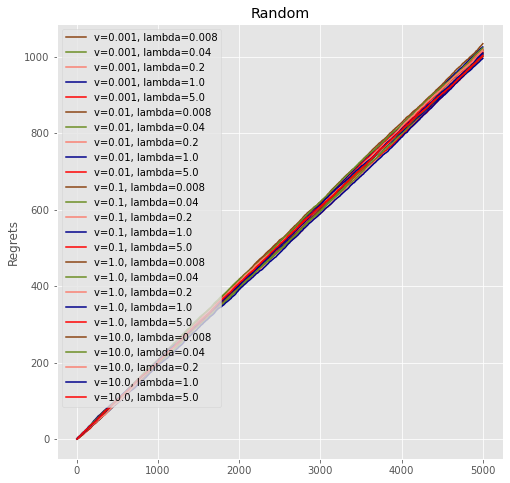

RGraphTS


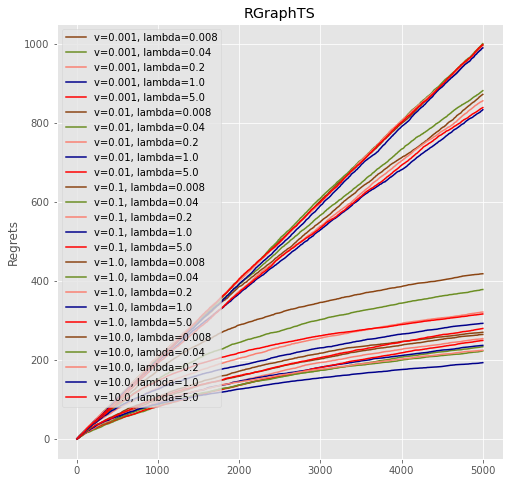

LinTS


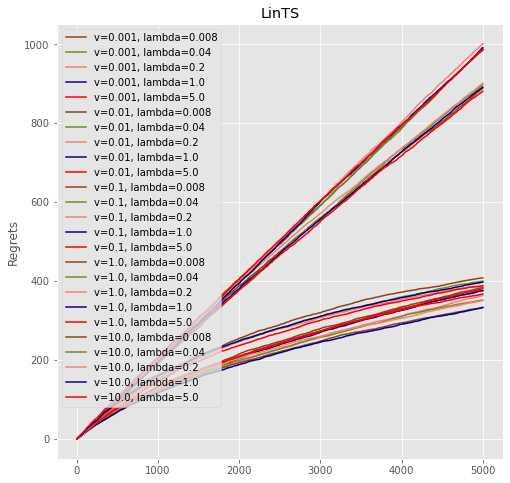

SemiRGraphTS


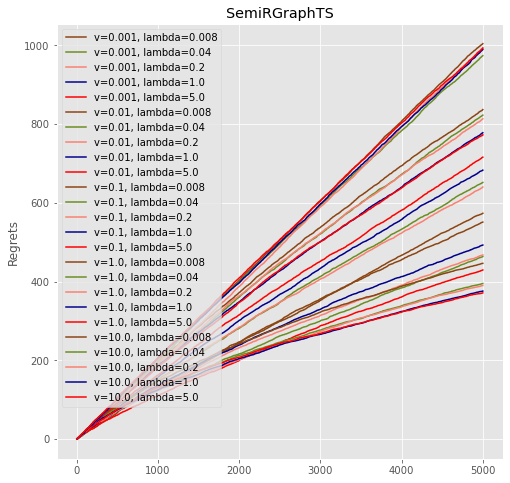

CLUB


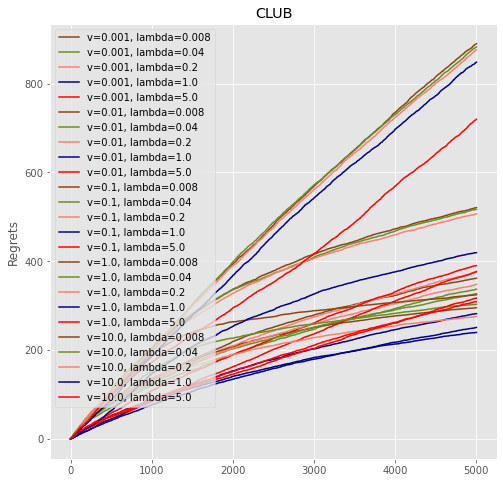

SCLUB


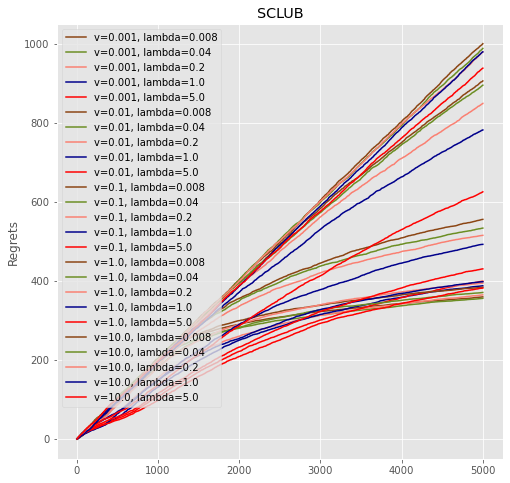

DyClu


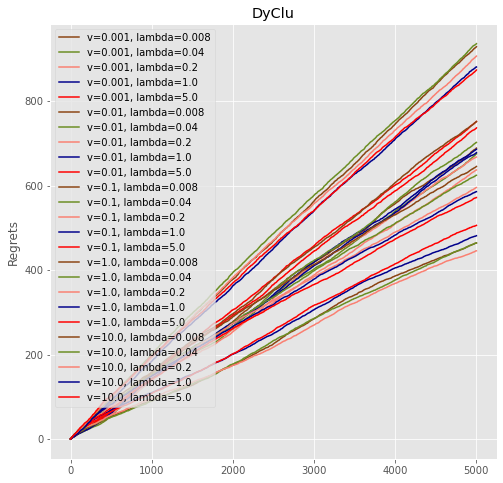

GraphUCBlocal


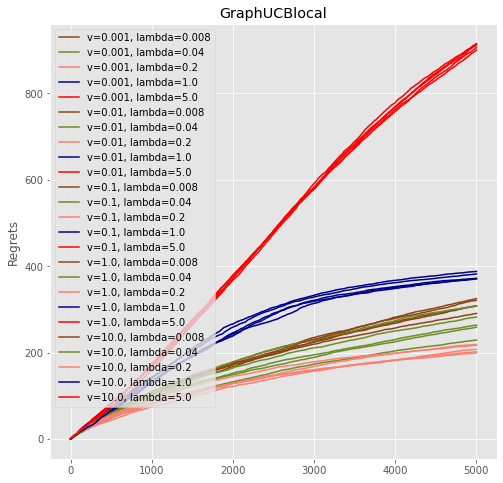

IndividualSemiRidgeGraphThompson


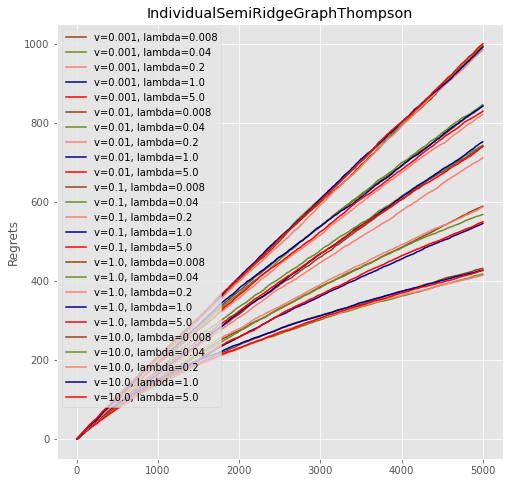

LinTS_Single


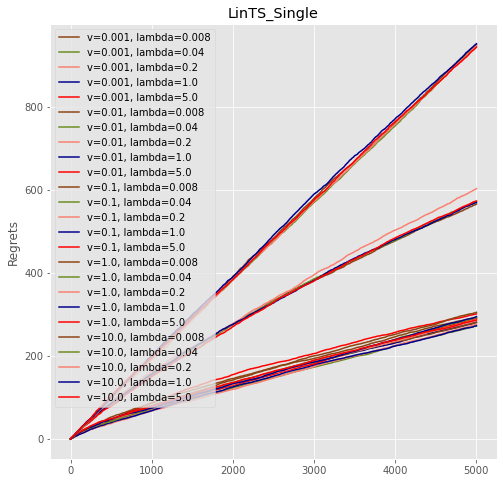

SemiTS_Single


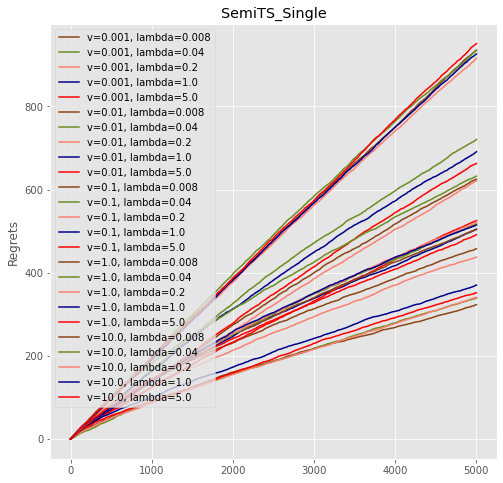

In [13]:
if we_need_tuning == True:
    algo_list = selected_models
    colors=["black", "darkred", "peru", "darkorange", "gold",
            "yellowgreen", "limegreen", "lightseagreen", "deepskyblue", "blue",
            "darkviolet", "magenta", "khaki", "plum", "grey",
            "steelblue", "lightcoral", "bisque", "darkolivegreen", "darkcyan",
            "saddlebrown", "olivedrab", "salmon", "darkblue", "red",
            "black", "darkred", "peru", "darkorange", "gold"]

    colors_by_lam = []
    temp = colors[20:20+lam_num]
    for i in range(v_num):
        colors_by_lam += temp

    colors_by_v = []
    for i in range(lam_num):
        temp = [colors[20+i] for j in range(v_num)]
        colors_by_v += temp

    RT_dict = {}
    for MODEL in algo_list:
        print(MODEL)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors, Labels, results)
        RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_lam, Labels, results)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_v, Labels, results)
else:
    print("No tuning.")

## Checkpoint: best tuning result of each algorithm

#n=30,arms=10,d=40,T=5000,arm_type=sparse
Random: v= 1.0, lam = 1.0
RGraphTS: v= 0.01, lam = 1.0
LinTS: v= 0.01, lam = 1.0
SCLUB: v= 0.001, lam = 0.04
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.1, lam = 1.0
DyClu: v= 0.1, lam = 0.2
SemiRGraphTS: v= 0.1, lam = 5.0
GraphUCBlocal: v= 0.01, lam = 0.2
IndividualSemiRidgeGraphThompson: v= 0.1, lam = 0.2
LinTS_Single: v= 0.001, lam = 0.04
SemiTS_Single: v= 0.1, lam = 0.008



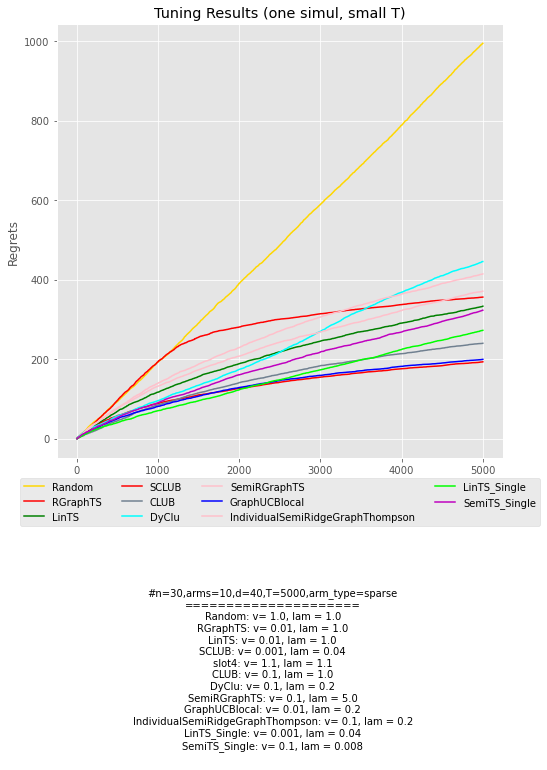

In [14]:
colors = ["gold", "r","g","r","k","slategrey","aqua","pink", "blue", "pink", "lime", "m"]
if we_need_tuning == True:
    best_v_lam_pair_dict, tuning_info = return_best_v_and_lambda_pair_real(selected_models, user_num, arm_num, dimension, tuning_time_horizon, arm_type, colors, results, RT_dict)
    # synthetic data also uses "return_best_..._pair_real"
else:
    print("No tuning.")
    best_v_lam_pair_dict = TUNED_V_LAM
    tuning_info = "No tuning.\n"+ str(TUNED_V_LAM).replace('}, ', '}\n')[1:-1]

In [15]:
print("we_need_tuning =", we_need_tuning)
best_v_lam_pair_dict

we_need_tuning = True


{'Random': {'v': 1.0, 'lam': 1.0},
 'RGraphTS': {'v': 0.01, 'lam': 1.0},
 'LinTS': {'v': 0.01, 'lam': 1.0},
 'SCLUB': {'v': 0.001, 'lam': 0.04},
 'slot4': {'v': 1.1, 'lam': 1.1},
 'CLUB': {'v': 0.1, 'lam': 1.0},
 'DyClu': {'v': 0.1, 'lam': 0.2},
 'SemiRGraphTS': {'v': 0.1, 'lam': 5.0},
 'GraphUCBlocal': {'v': 0.01, 'lam': 0.2},
 'IndividualSemiRidgeGraphThompson': {'v': 0.1, 'lam': 0.2},
 'LinTS_Single': {'v': 0.001, 'lam': 0.04},
 'SemiTS_Single': {'v': 0.1, 'lam': 0.008}}

## Final simulation with best hyper parameters

In [16]:
cumulated_regret_dict, info_computing_time = run_all_algo_with_best_v_lam_SYNTH(selected_models,\
                                                                                best_v_lam_pair_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)

<set models>
RidgeTS, time = 0.0008914470672607422 sec
IndTS, time = 0.0005891323089599609 sec
SCLUB, time = 0.0010600090026855469 sec
CLUB, time = 0.001203298568725586 sec
DyClu, time = 0.000125885009765625 sec
SemiRidegeTS, time = 0.0008924007415771484 sec
GUCBlocal, time = 0.0017018318176269531 sec
IndividualSemiRidgeGraphThompson, time = 0.0005285739898681641 sec
LinTS_Single, time = 2.6464462280273438e-05 sec
SemiTS_Single, time = 2.5272369384765625e-05 sec
0 user: 12 / selected arms: 3 2 0 6 -1 6 6 1 8 5 7 7 / opt_arm: 6 / time : 0.017 sec
=====
500 user: 0 / selected arms: 7 7 2 2 -1 6 6 1 0 5 6 6 / opt_arm: 8 / time : 0.03 sec
=====
1000 user: 4 / selected arms: 7 2 3 0 -1 2 6 1 8 2 2 5 / opt_arm: 2 / time : 0.032 sec
=====
1500 user: 3 / selected arms: 7 4 9 6 -1 4 6 4 4 4 4 7 / opt_arm: 4 / time : 0.033 sec
=====
2000 user: 9 / selected arms: 6 2 6 7 -1 2 7 5 2 2 2 3 / opt_arm: 2 / time : 0.033 sec
=====
2500 user: 8 / selected arms: 7 9 9 9 -1 9 0 9 9 9 9 9 / opt_arm: 9 / ti

## Final plot

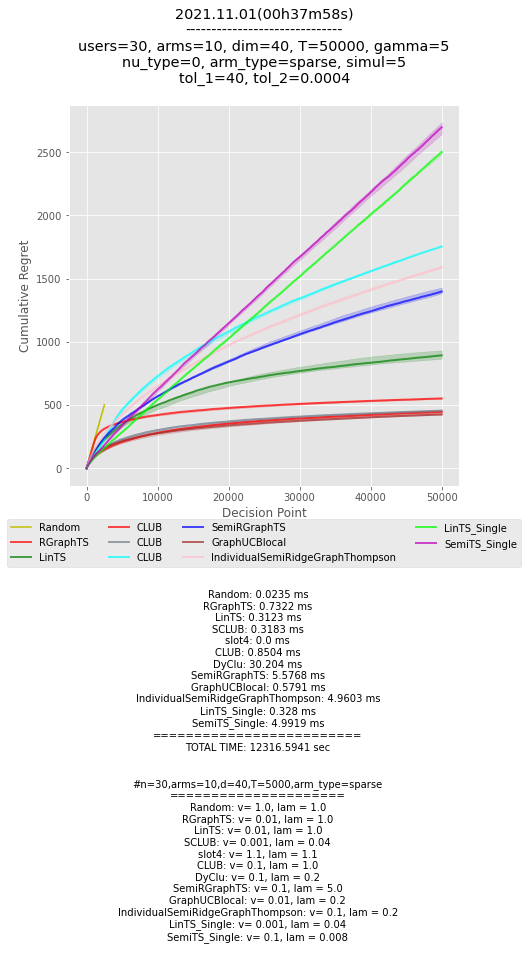


<parameters>
user_num = 30 / arm_num = 10 / dimension = 40
delta = 0.05 / R = 0.1 / gamma (for smooth Theta) = 5
-----
const_tol_1 = 40 / const_tol_2 = 0.0004
graph = ER / laplacian=random_walk / threshold = 0.5 / prob = 0.4 / const_alpha_2 = 0.15
########################################

<mean computing time>
Random: 0.0235 ms
RGraphTS: 0.7322 ms
LinTS: 0.3123 ms
SCLUB: 0.3183 ms
slot4: 0.0 ms
CLUB: 0.8504 ms
DyClu: 30.204 ms
SemiRGraphTS: 5.5768 ms
GraphUCBlocal: 0.5791 ms
IndividualSemiRidgeGraphThompson: 4.9603 ms
LinTS_Single: 0.328 ms
SemiTS_Single: 4.9919 ms
TOTAL TIME: 12316.5941 sec
########################################

<best tuning parameter>
#n=30,arms=10,d=40,T=5000,arm_type=sparse
Random: v= 1.0, lam = 1.0
RGraphTS: v= 0.01, lam = 1.0
LinTS: v= 0.01, lam = 1.0
SCLUB: v= 0.001, lam = 0.04
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.1, lam = 1.0
DyClu: v= 0.1, lam = 0.2
SemiRGraphTS: v= 0.1, lam = 5.0
GraphUCBlocal: v= 0.01, lam = 0.2
IndividualSemiRidgeGraphThompson: v= 0.1, l

In [17]:
NOW = datetime.now().strftime('%Y.%m.%d(%Hh%Mm%Ss)')
IMG_NAME = "arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type+"_T="+str(time_horizon) + "_simul"+str(simul_n) +"("+ NOW+ ").png"
IMG_PATH = IMG_FOLDER+"/"+IMG_NAME

if not os.path.exists(IMG_FOLDER_FOR_OS):
    os.makedirs(IMG_FOLDER_FOR_OS)

SAVE = True # False

const_linewidth = 2
const_transparency = 0.7
const_cut_random = 20 # Random
const_cut_semi = 1 # SemiRGraphTS

show_and_save_plot(SAVE, const_linewidth, const_transparency, const_cut_random, const_cut_semi, cumulated_regret_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, lap_type, our_graph_type, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type, info_computing_time, tuning_info, IMG_PATH, NOW)


In [18]:
print(NOW)

2021.11.01(00h37m58s)


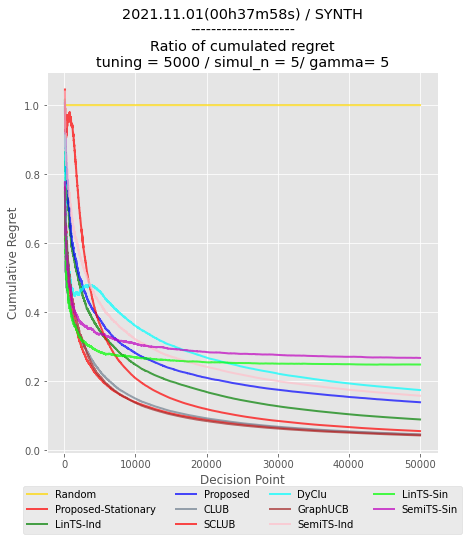

In [19]:
start = 100 # ignore round 1 to "start"
steps=np.arange(start+1,time_horizon+1)

LW = const_linewidth
TP = const_transparency
plt.figure(figsize=(7,7))

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

denominator = np.median(cumulated_regret_dict["Random"], axis=0)[start:]

for MODEL in selected_models:
    COLOR = colors_dict[MODEL]
    numerator = np.median(cumulated_regret_dict[MODEL], axis=0)[start:]
    fraction = np.divide(numerator, denominator)
    plt.plot(steps, fraction, COLOR, linewidth = LW, alpha =  TP, label=labels_dict[MODEL])
    
plt.xlabel('Decision Point')
plt.ylabel('Cumulative Regret')
if we_need_tuning == True:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + str(tuning_time_horizon)+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
else:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + "NO"+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15),fancybox=True,ncol=4)

if SAVE == True:
    RATIO_FOLDER = IMG_FOLDER+"/ratio_image_folder"
    RATIO_FOLDER_FOR_OS = current_dir+"/"+ RATIO_FOLDER
    if not os.path.exists(RATIO_FOLDER_FOR_OS):
        os.makedirs(RATIO_FOLDER_FOR_OS)
        
    plt.savefig(RATIO_FOLDER+"/"+ "ratio_" +my_data + "_" + IMG_NAME, bbox_inches='tight')
    
plt.show()

In [20]:
if SAVE == True:
    REGRET_FOLDER = IMG_FOLDER+"/regret_saving_folder/regret_"+NOW
    REGRET_FOLDER_FOR_OS = current_dir+"/"+REGRET_FOLDER
    if not os.path.exists(REGRET_FOLDER_FOR_OS):
        os.makedirs(REGRET_FOLDER_FOR_OS)

    for MODEL in selected_models:
        np.save(REGRET_FOLDER+'/cumulated_regret_'+ MODEL +"_gamma_"+str(gamma)+'.npy', cumulated_regret_dict[MODEL])